#### Demo1 CAST Mark captures common spatial features across multiple samples

In [1]:
import os
import numpy as np
import anndata as ad
import scanpy as sc
import CAST
import warnings
warnings.filterwarnings("ignore")
# work_dir = '$demo_path' #### input the demo path

Using backend: pytorch


#### Load Data
- CAST Mark method only require the following data modalities:
    1. gene expression raw counts
    2. spatial coordinates of the cells
- We organize spatial omics data in the AnnData format (We recommend readers to pre-organize data in this format):
    - `adata.X` stores the STARmap gene expression raw counts
    - `adata.obs` contains important cell-level annotation, including spatial coordinates (column name: `'x'`, `'y'`)
    - Data for different experimental samples are combined in a single Anndata object (column name `'sample'`)

#### Settings

In [2]:
output_path = f'{work_dir}/demo1_CAST_Mark/demo_output'
os.makedirs(output_path, exist_ok=True)
adata = ad.read_h5ad(f'{output_path}/../data/demo1.h5ad')
adata.layers['norm_1e4'] = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)['X'].toarray() # we use normalized counts for each cell as input gene expression

samples = np.unique(adata.obs['sample']) # used samples in adata
coords_raw = {sample_t: np.array(adata.obs[['x','y']])[adata.obs['sample'] == sample_t] for sample_t in samples}
exp_dict = {sample_t: adata[adata.obs['sample'] == sample_t].layers['norm_1e4'] for sample_t in samples}

#### Run

Constructing delaunay graphs for 8 samples...
Training on cuda:0...


Loss: -423.114 step time=0.420s: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [02:48<00:00,  2.38it/s]


Finished.
The embedding, log, model files were saved to /home/unix/ztang/wanglab/tangzefang/03.Projects/05.CCF/04.packaged_code/code_and_demo_v0.40/CAST/demo/demo1_CAST_Mark/demo_output


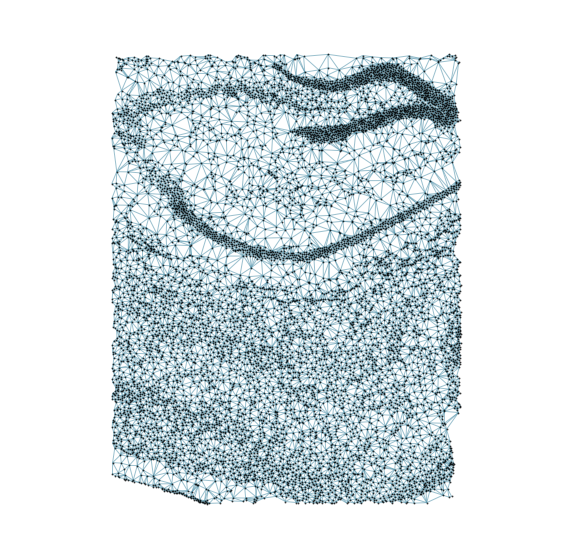

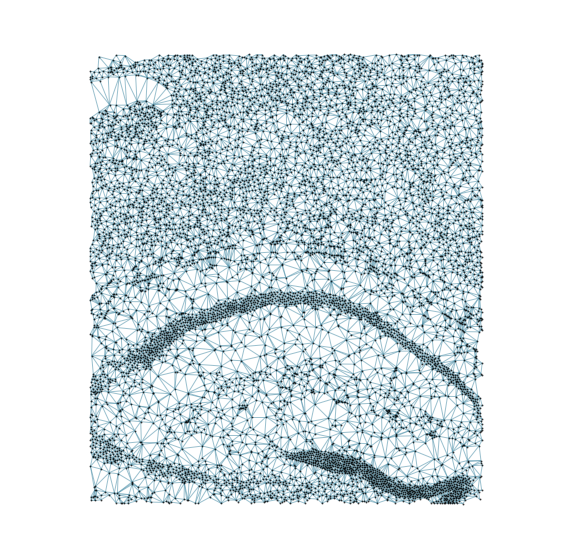

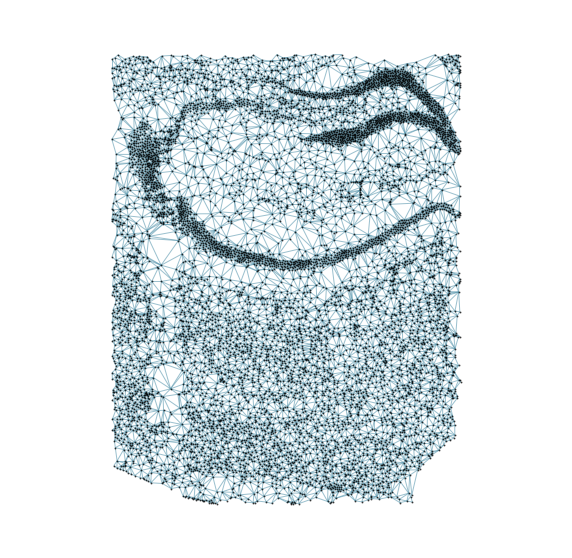

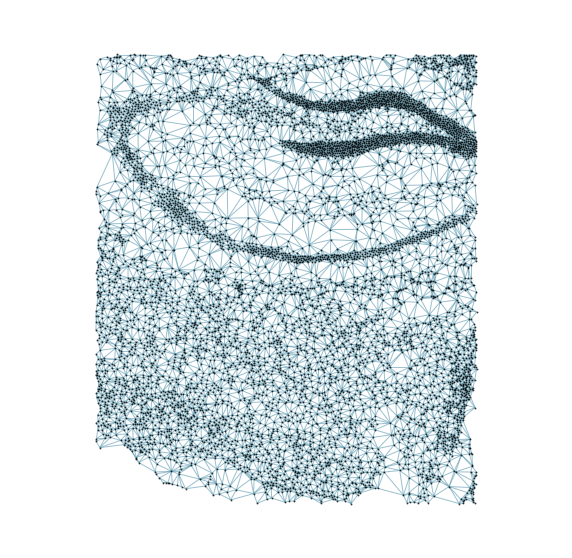

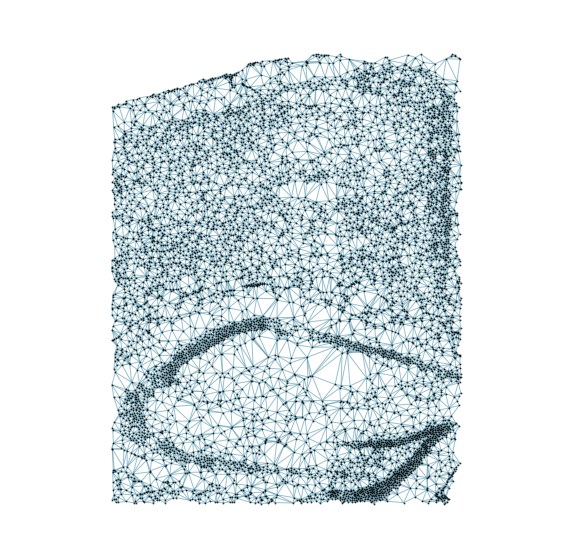

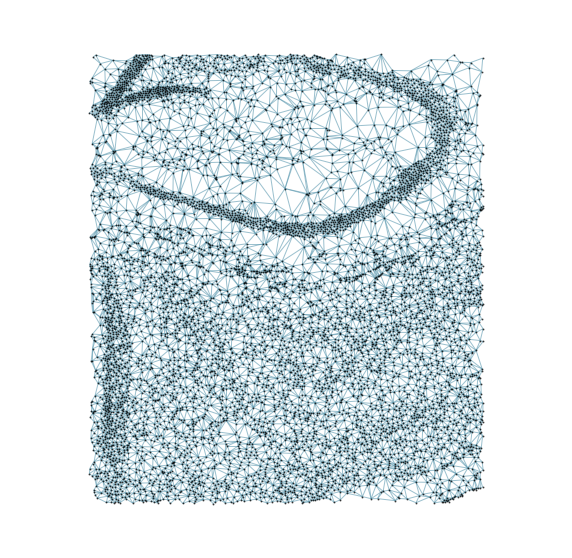

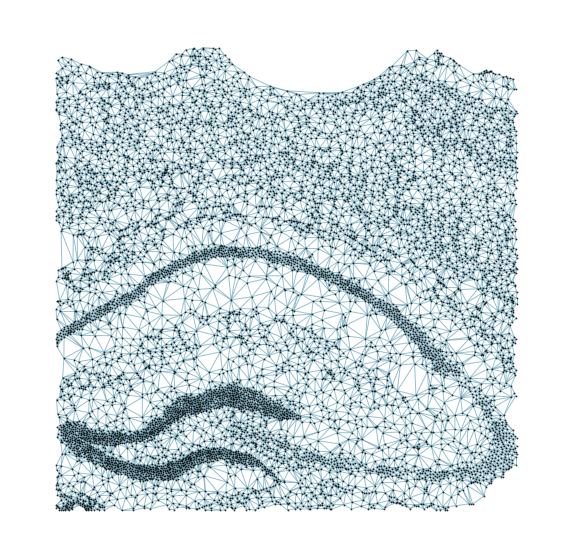

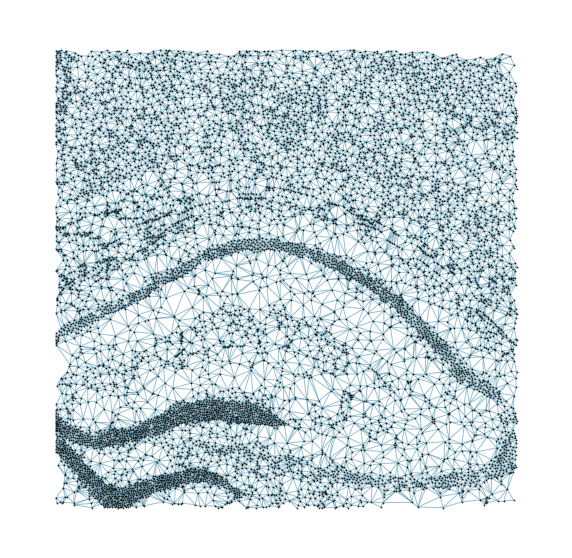

In [3]:
### Run the model to generate the graph embedding
embed_dict = CAST.CAST_MARK(coords_raw,exp_dict,output_path)

### CPU with single core may takes long time for each epoch. If it takes too long, you could set:
### embed_dict = CAST_MARK(coords_raw,exp_dict,output_path,epoch_t = 20)

Perform KMeans clustering on 72165 cells...
Plotting the KMeans clustering results...


array([18, 11, 18, ..., 11,  9, 11], dtype=int32)

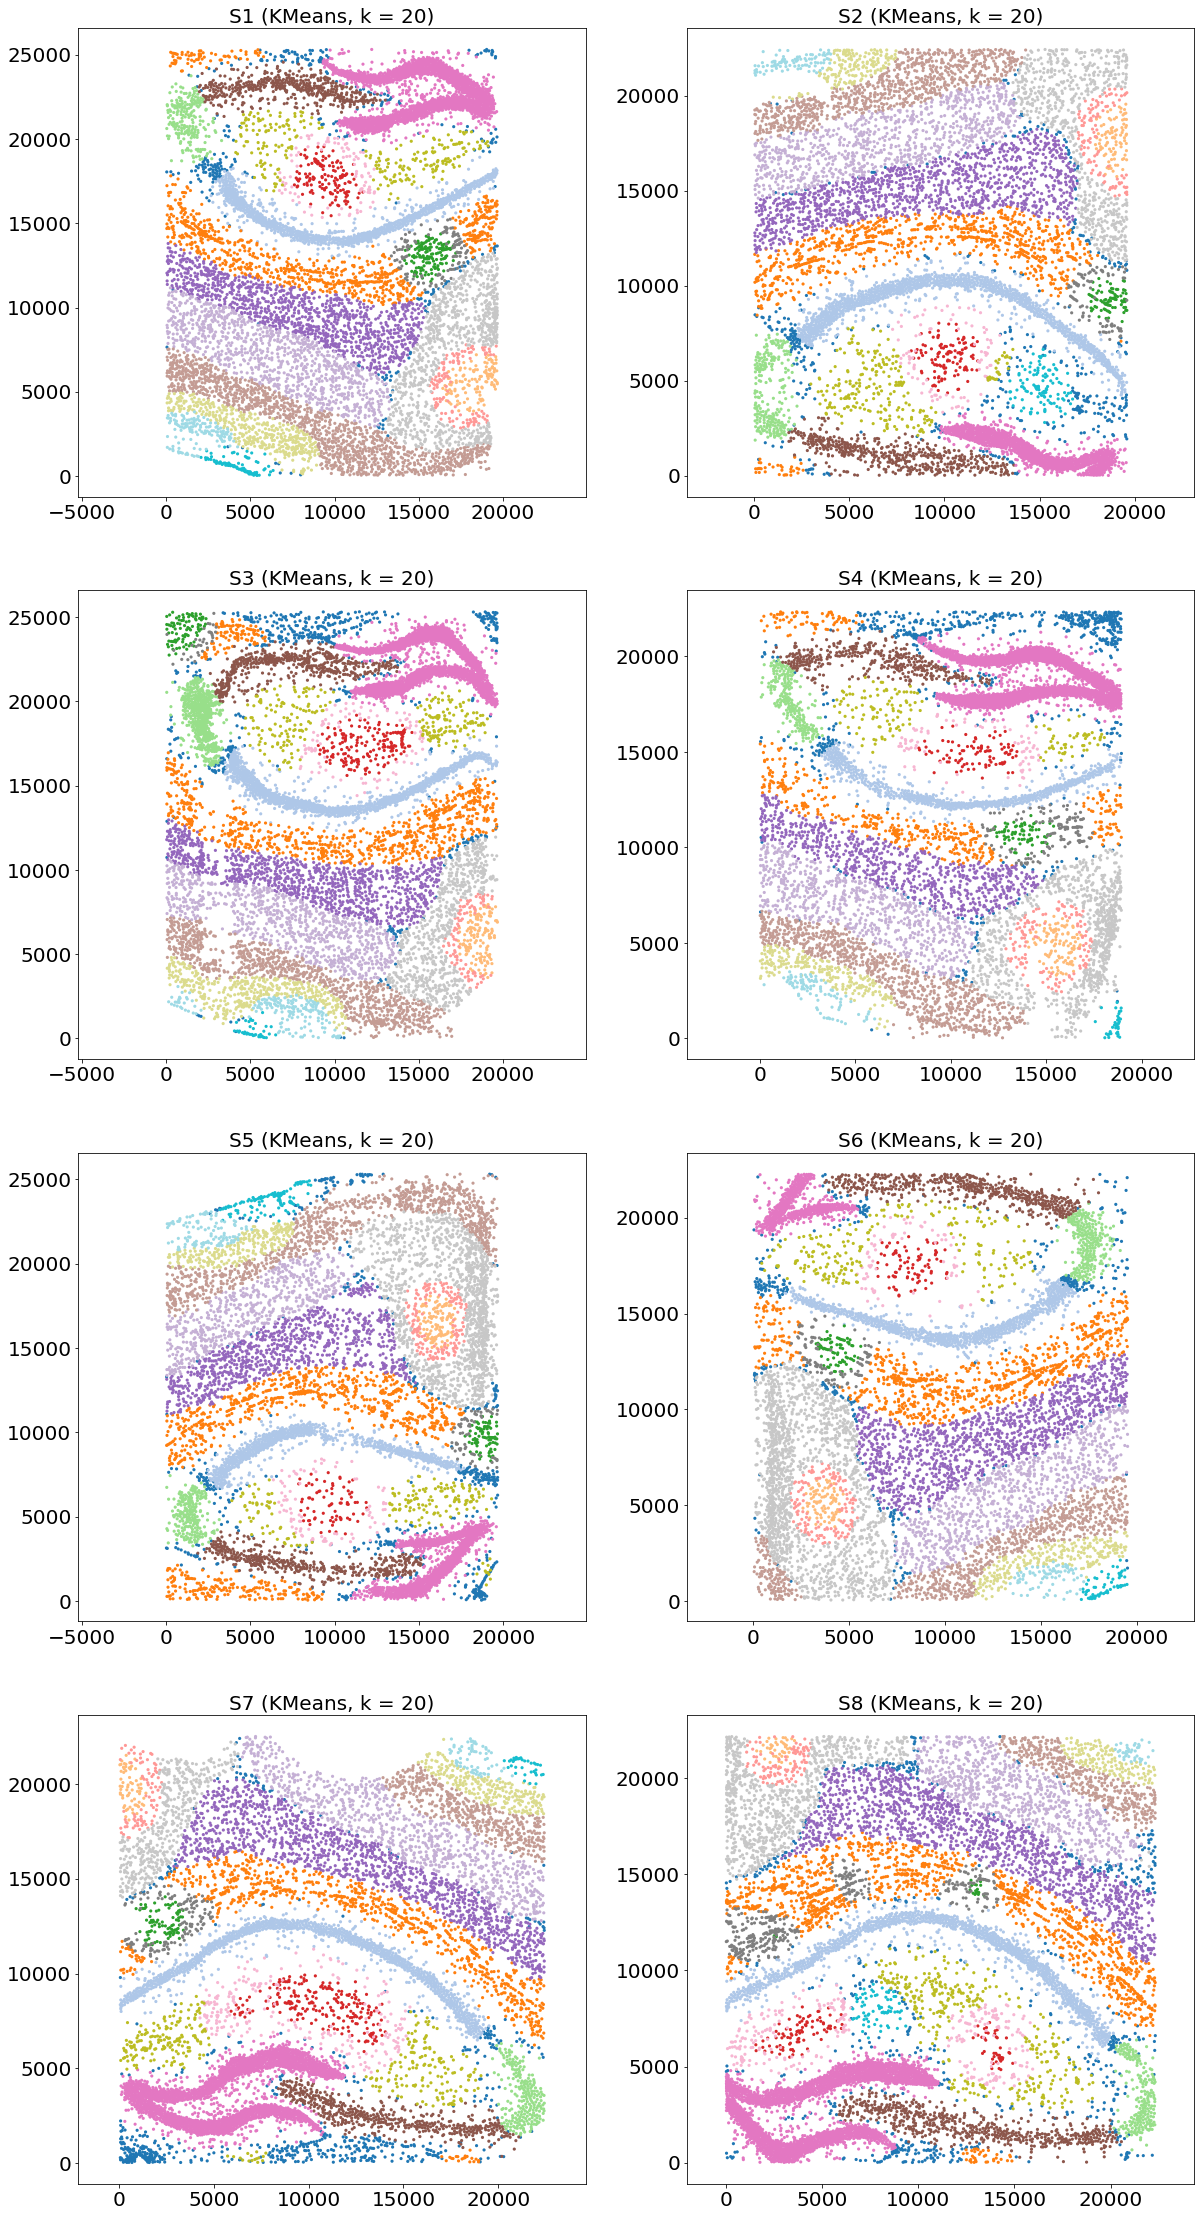

In [4]:
### Visualize the embedding with Kmeans clustering
CAST.kmeans_plot_multiple(embed_dict,samples,coords_raw,'demo1',output_path,k=20,dot_size = 10,minibatch=False)